In [72]:
import pandas as pd
import numpy as np

heart = pd.read_csv('heart.csv')
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [73]:
#Задание 8.1
#Создайте новый признак old, где 1 — при возрасте пациента более 60 лет.
#В ответ введите результат выполнения кода heart['old'].sum().

heart['old'] = heart['age'].apply(lambda x: 1 if x>60 else 0)
heart['old'].sum()

79

In [74]:
#Задание 8.2
#Создайте новый признак trestbps_mean, который будет обозначать норму давления в среднем для его возраста и пола. 
# trestbps — систолическое артериальное давление в состоянии покоя.

# создадим функцию, которая сделает столбец пар [x,y] где x- норма для Ж, а У- норма для М

def set_trestbps_mean_man(x):
    if x< 20:
        return 123
    elif x<=30:
        return 126
    elif x<=40:
        return 129
    elif x<=50:
        return 135
    elif x<=60:
        return 142
    else:
        return 142

def set_trestbps_mean_woman(x):
    if x< 20:
        return 116
    elif x<=30:
        return 120
    elif x<=40:
        return 127
    elif x<=50:
        return 137
    elif x<=60:
        return 144
    else:
        return 159

heart['m_tr'] = heart['age'].apply(set_trestbps_mean_man)
heart['w_tr'] = heart['age'].apply(set_trestbps_mean_woman)
heart['trestbps_mean'] = heart['sex']*heart['m_tr'] + (1-heart['sex'])*heart['w_tr']
heart = heart.drop(['m_tr','w_tr'], axis=1)



In [75]:
display(heart.head(20))
heart['trestbps_mean'][300]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,old,trestbps_mean
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,142
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,0,129
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,137
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,0,142
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,144
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,0,142
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,0,144
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,0,135
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,0,142
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,0,142


142

In [76]:
heart.nunique()

age               41
sex                2
cp                 4
trestbps          49
chol             152
fbs                2
restecg            3
thalach           91
exang              2
oldpeak           40
slope              3
ca                 5
thal               4
target             2
old                2
trestbps_mean      8
dtype: int64

In [ ]:
#Задание 8.6

#Нормализуйте все числовые признаки подходящим способом.

In [77]:
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['cp','restecg','slope','ca','thal']) # указываем столбцы для кодирования
type_bin = encoder.fit_transform(heart.drop(['age','sex','trestbps','chol','fbs','thalach','oldpeak','target','old','trestbps_mean'],axis=1))



In [78]:
heart = pd.concat([heart, type_bin], axis=1)
heart.shape

(303, 36)

In [79]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,slope_3,ca_1,ca_2,ca_3,ca_4,ca_5,thal_1,thal_2,thal_3,thal_4
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,...,0.462046,0.577558,0.125413,0.214521,0.066007,0.016502,0.059406,0.547855,0.386139,0.006601
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,...,0.499382,0.494765,0.331734,0.411169,0.248704,0.127605,0.236774,0.498528,0.487668,0.081110
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
heart_norm = pd.concat([heart['age'], heart['trestbps'], heart['chol'], heart['thalach'], heart['oldpeak'], heart['trestbps_mean']  ], axis=1)
heart_norm


,age,trestbps,chol,thalach,oldpeak,trestbps_mean
0,63,145,233,150,2.3,142
1,37,130,250,187,3.5,129
2,41,130,204,172,1.4,137
3,56,120,236,178,0.8,142
4,57,120,354,163,0.6,144
...,...,...,...,...,...,...
298,57,140,241,123,0.2,144
299,45,110,264,132,1.2,135
300,68,144,193,141,3.4,142
301,57,130,131,115,1.2,142


In [84]:
from sklearn import preprocessing
col_names = list(heart_norm.columns)
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(heart_norm)
df_r = pd.DataFrame(df_r, columns=col_names)
df_r.describe()

,age,trestbps,chol,thalach,oldpeak,trestbps_mean
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,-0.046938,0.081188,0.098646,-0.103173,0.149752,-0.066007
std,0.672748,0.876907,0.816232,0.704774,0.725672,1.487564
min,-1.925926,-1.800000,-1.795276,-2.523077,-0.500000,-3.200000
25%,-0.555556,-0.500000,-0.456693,-0.600000,-0.500000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.444444,0.500000,0.543307,0.400000,0.500000,0.000000
max,1.629630,3.500000,5.102362,1.507692,3.375000,3.400000


In [85]:
heart = heart.drop(['age','trestbps','chol','thalach','oldpeak','trestbps_mean'],axis =1)
heart = pd.concat([heart, df_r  ], axis=1)

In [86]:
heart

,sex,cp,fbs,restecg,exang,slope,ca,thal,target,old,...,thal_1,thal_2,thal_3,thal_4,age,trestbps,chol,thalach,oldpeak,trestbps_mean
0,1,3,1,0,0,0,0,1,1,1,...,1,0,0,0,0.592593,0.75,-0.110236,-0.092308,0.9375,0.0
1,1,2,0,1,0,0,0,2,1,0,...,0,1,0,0,-1.333333,0.00,0.157480,1.046154,1.6875,-2.6
2,0,1,0,0,0,2,0,2,1,0,...,0,1,0,0,-1.037037,0.00,-0.566929,0.584615,0.3750,-1.0
3,1,1,0,1,0,2,0,2,1,0,...,0,1,0,0,0.074074,-0.50,-0.062992,0.769231,0.0000,0.0
4,0,0,0,1,1,2,0,2,1,0,...,0,1,0,0,0.148148,-0.50,1.795276,0.307692,-0.1250,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0,0,...,0,0,1,0,0.148148,0.50,0.015748,-0.923077,-0.3750,0.4
299,1,3,0,1,0,1,0,3,0,0,...,0,0,1,0,-0.740741,-1.00,0.377953,-0.646154,0.2500,-1.4
300,1,0,1,1,0,1,2,3,0,1,...,0,0,1,0,0.962963,0.70,-0.740157,-0.369231,1.6250,0.0
301,1,0,0,1,1,1,1,3,0,0,...,0,0,1,0,0.148148,0.00,-1.716535,-1.169231,0.2500,0.0


<AxesSubplot:>

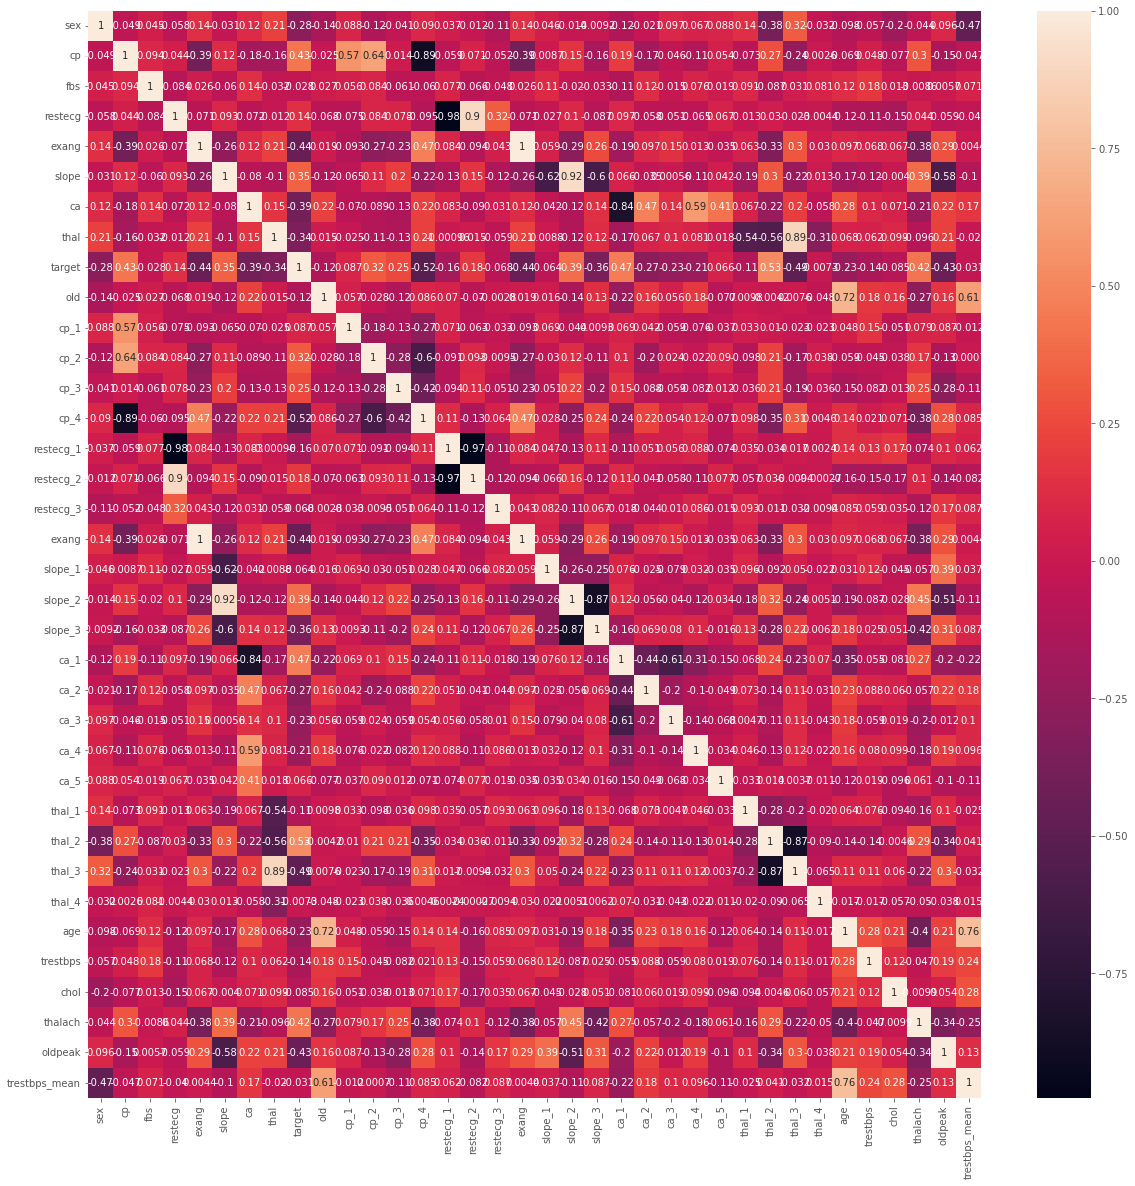

In [88]:
#Задание 8.7

#Проведите корреляционный анализ и отберите признаки для будущей модели. Выберите пары сильно скоррелированных признаков
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
matplotlib.style.use('ggplot')


fig, (ax1) = plt.subplots(ncols=1, figsize=(20, 20))
sns.heatmap(heart.corr(), annot=True, ax=ax1)